# Spectogram Analysis on: whole readings / on one rotation

In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Set Loading

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
power = "0hp_"
fault_type = "normal_"
bearing_type = "DE"
rpm = "1796"
extention = ".csv"

read_name = power + fault_type + rpm + extention
save_path_name = "spectogram_map\\" + power + fault_type + bearing_type

In [4]:
path = "..\Bearing Vibration Image\data_set_48k_csv\\" + read_name
current_data = load_data(path)

In [5]:
data = current_data.values[:, 0]

# SciPy

## FFT

In [6]:
# samples = data.shape[0]
samples = 2028 #data.shape[0] or a number (like 1622)
if samples == 2028:
    save_path_name = save_path_name + "_one_rotation"
else:
    save_path_name = save_path_name + "_all_data"

In [7]:
test_for_one_rotation = data[:samples]

In [8]:
test_for_one_rotation

array([ 0.05319692,  0.08866154,  0.09971815, ..., -0.05090215,
       -0.035256  ,  0.00208615])

In [9]:
y = abs(fft(test_for_one_rotation))

In [14]:
print(y.shape)

(2028,)


In [11]:
window_size = 1623
sampling_rate = 48000
time_increment = sampling_rate / window_size
no_sample = test_for_one_rotation.shape[0]

print(time_increment)

29.57486136783734


In [12]:
x = np.arange(no_sample) * time_increment

1014


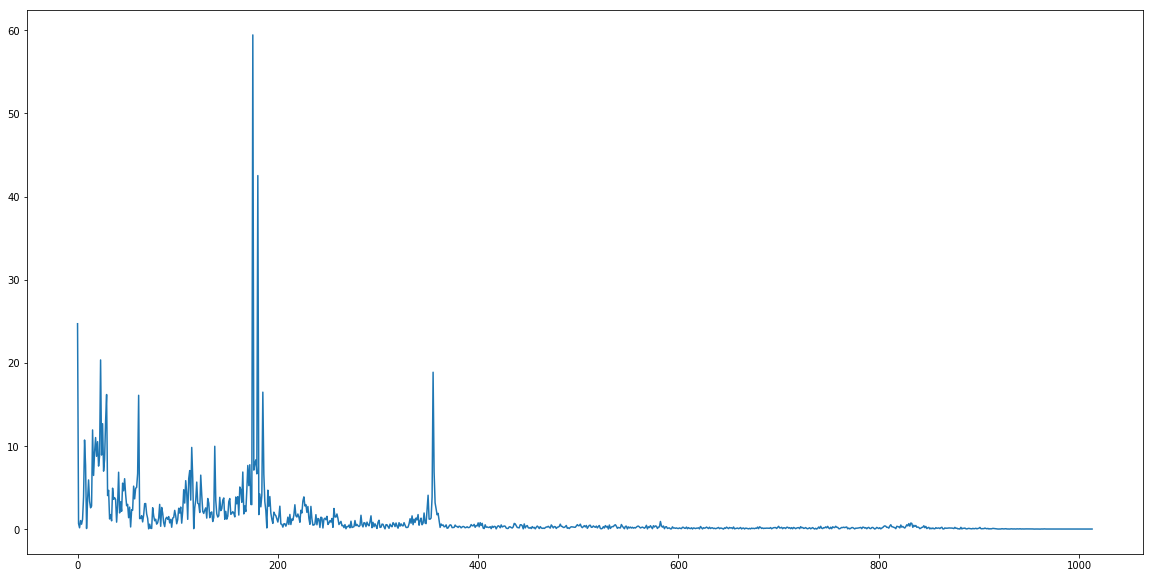

In [23]:
fig = plt.figure(figsize=(20,10))

y = y[:y.shape[0]//2]
plt.plot(y)

plt.show()

## STFT

In [531]:
fs = 48000
window_size = 1623
f, t, Zxx = signal.stft(test_for_one_rotation, fs, nperseg = window_size)

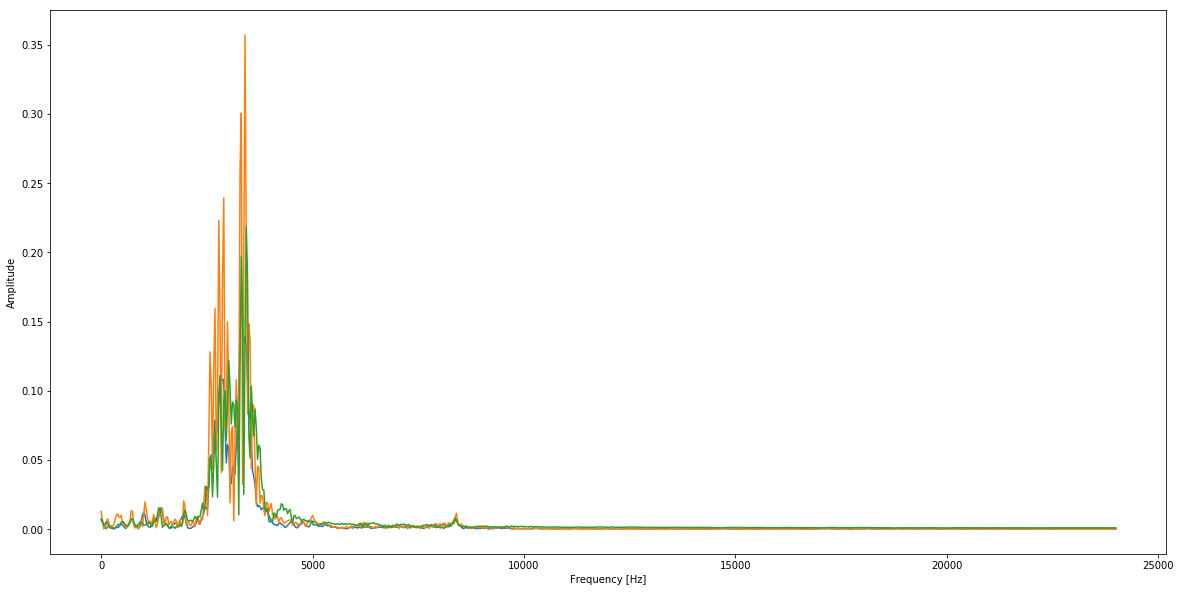

In [532]:
fig = plt.figure(figsize=(20,10))
plt.plot(f, np.abs(Zxx[: ,:3]))
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.savefig(save_path_name + "_stft.png")

In [533]:
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig(save_path_name + "_signal_stft.png")

In [534]:
f, t, Sxx = signal.spectrogram(test_for_one_rotation, fs)

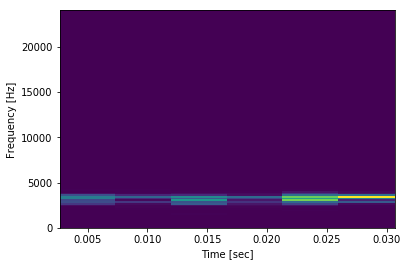

In [535]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.savefig(save_path_name + "_signal_spectogram.png")

## PyPlot Spectogram

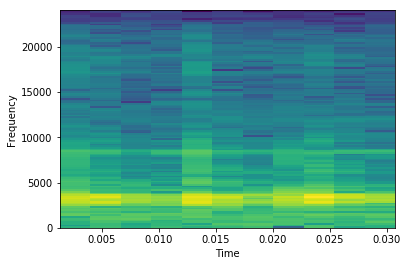

In [536]:
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(test_for_one_rotation, Fs=fs)
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.savefig(save_path_name + "_plt_spectrum.png")